In [3]:
import pandas as pd,os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
print(os.listdir())

['.config', 'sample_data']


In [7]:
crop_df = pd.read_csv("/content/crop_production.csv")

In [8]:
crop_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [9]:
crop_df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              1
Crop                2
Area                2
Production       3576
dtype: int64

In [10]:
crop_df.dropna(inplace=True)

In [11]:
crop_df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [12]:
crop_df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [13]:
crop_df['Season'].value_counts()

Season
Kharif         70791
Rabi           49230
Whole Year     42924
Summer         10593
Winter          5788
Autumn          4573
Name: count, dtype: int64

In [19]:
crop_df['Season'] = crop_df['Season'].apply(lambda x: x.strip()) # Remove extra space before 'Season'
crop_df["Crop"] = crop_df["Crop"].apply(lambda x: x.strip())
crop_df["Crop"] = crop_df["State_Name"].apply(lambda x: x.strip()) # Use the correct column name 'State_Name'

In [20]:
crop_df.Season.unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [21]:
crop_df['Season'].value_counts()

Season
Kharif        70791
Rabi          49230
Whole Year    42924
Summer        10593
Winter         5788
Autumn         4573
Name: count, dtype: int64

In [23]:
crop_df['Season' ]=crop_df["Season"].apply(lambda x: x.replace('Autumn', "Kharif")) # Removed extra double quote after Autumn
crop_df["Season"]=crop_df[ "Season"].apply(lambda x: x.replace("Summer", "Kharif"))
crop_df ["Season"]=crop_df[ "Season"].apply(lambda x: x.replace("Winter", "Rabi")) # Replaced variable winter with string "Winter" and changed - to =

In [24]:
crop_df["Season"].value_counts()

Season
Kharif        85957
Rabi          55018
Whole Year    42924
Name: count, dtype: int64

In [25]:
crop_df.drop(crop_df[crop_df['Production']==0].index, inplace=True)
print(f"After removing the row which has a Production: {crop_df.shape[0]}")

After removing the row which has a Production: 181258


In [26]:
crop_df.Crop.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa',
       'Gujarat', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan'], dtype=object)

In [28]:
crop_df["Crop"]=crop_df[ 'Crop' ].apply(lambda x:x.replace('Kapas', 'Cotton(Iint)') \
.replace('Cotton (Iint)', 'Cotton'))
crop_df.replace('Jute & mesta', 'Jute', inplace=True)
crop_df.replace("esta", "Jute", inplace=True)

In [42]:
crop_df["Crop"] = crop_df["Crop"].apply(lambda x:x.replace("other Kharif pulses, pulses", "pulses") \
.replace('Other Rabi pulses, pulses', 'pulses') \
.replace("Peas & beans (Pulses)", 'pulses') \
.replace("Pulses total", 'pulses') \
.replace('other misc. pulses', 'pulses') \
.replace("Moong(Green Gram)", 'pulses') \
.replace("Urad", 'pulses') \
.replace("Arhar/Tur", 'pulses') \
.replace("Bean", 'pulses') \
.replace("Ricebean (nagadal)", 'pulses') \
.replace("Lentil", "pulses") \
.replace("Masoor", "pulses") \
.replace("Khesari", 'pulses') \
.replace("Horse-gram", 'pulses') \
.replace("Rajmash Kholar", 'pulses'))

In [43]:
crop_df['crop']=crop_df['Crop'].apply(lambda x:x
                                      .replace('Atconut (Row)' , 'Arecanut')
                                      .replace('Arconut (Processed)' , 'Arecanut')
                                      .replace('Arecanut', 'Arecanut'))

In [45]:

df = crop_df.copy()  # Create a copy of crop_df and assign it to df

df['crop'] = crop_df['Crop'].apply(lambda x:x
                                 .replace('Black pepper' , 'Other Spices')
                                 .replace('Cardamon' , 'Other Spices')
                                 .replace('Perilla', 'Other Spices'))

In [47]:
crop_df['Crop'] = crop_df['Crop'].apply(lambda x:x
.replace('Papaya', 'Fruits')
.replace("Mango", "Fruits")
.replace('Orange', 'Fruits')
.replace('Other Fresh Fruits', 'Fruits')
.replace('Pineapple', 'Fruits')
.replace('Citrus Fruit', 'Fruits')
.replace('Pome Fruit', 'Fruits')
.replace('Pome Granet', 'Fruits')
.replace('Grapes', 'Fruits')
.replace('Jack Fruit', 'Fruits')
.replace('Sapots', 'Fruits')
.replace('Lemon', 'Fruits'))

In [53]:
crop_df['Crop']=crop_df["Crop"].apply(lambda x:x \
.replace("Ginger", "Dry ginger"))
crop_df['Crop'] = crop_df['Crop'].apply(lambda x:x.replace("Turnip", "Onion"))
crop_df['Crop'] = crop_df['Crop'].apply(lambda x:x.replace('Cashminut Raw', 'Cashesmut').replace("Cashewnut Processed", "Cashewnut"))

In [55]:
crop_df[ 'Crop']=crop_df['Crop'].apply(lambda x: x \
.replace('black gran', 'gran') \
.replace('Moth, gram', 'gram') \
.replace('Blackgram', 'gram'))

In [57]:
crop_df['Crop'] = crop_df['Crop'].apply(lambda x:x \
.replace('Oilseeds total', 'other oilseeds') \
.replace('Niger seed', 'other oilseeds'))

In [63]:
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x \
.replace('Other Cereals & Hillets', "Bajra") \
.replace('Samal', "Bajra") \
.replace('Small millets', 'Bajra') \
.replace('Ragi', 'Bajra') \
.replace('Varagu',"Bajra") \
.replace('Jobster', 'Bajra'))

In [71]:
crop_df['Crop']=crop_df["Crop"].apply(lambda x:x \
.replace('Coriander, ', 'Other Vegetables') \
.replace('pulsess & Mutter (Vegetable)', "Other Vegetables") \
.replace('Bhindi', "Other Vegetables") \
.replace("Tomato", 'Other Vegetables') \
.replace('Cowpea (Lobia)', 'Other Vegetables') \
.replace('Cabbage', 'Other Vegetables')\
.replace('Carrot', 'Other Vegetables')\
.replace("Drum Stick", 'Other Vegetables')\
.replace('Redish', 'Other Vegetables')\
.replace('Cauliflower', 'Other Vegetables')
.replace('Colocosia', 'Other Vegetables')\
.replace('Brinjal', 'Other vegetables')\
.replace('Bottle Gourd', 'Other Vegetables')\
.replace('Bitter Gourd', 'Other Vegetables'))

In [73]:
crop_df['Crop'] = crop_df['Crop'].apply(lambda x:x.replace('Niger seed', 'Sesamum'))
crop_df['Crop'] = crop_df["Crop"].apply(lambda x:x.replace('Korra', 'Total foodgrain'))
crop_df['Crop'] = crop_df[ 'Crop'].apply(lambda x:x.replace('Paddy', 'Rice'))

In [76]:
crop_df.drop(crop_df[crop_df['Crop'] == "Tea"].index, inplace=True)
crop_df.drop(crop_df[crop_df['Crop'] == "Coffee"].index, inplace=True)
crop_df.drop(crop_df[crop_df['Crop'] == "Rubber"].index, inplace=True)
crop_df.drop(crop_df[crop_df['Crop'] == "Cond-spcs other"].index, inplace=True)

In [77]:
crop_df.Crop.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa',
       'Gujarat', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan'], dtype=object)

In [78]:
crop_df.to_csv('crop.clean.csv')

In [79]:
crop_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,1254.0,2000.0,Andaman and Nicobar Islands
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,2.0,1.0,Andaman and Nicobar Islands
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,102.0,321.0,Andaman and Nicobar Islands
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,176.0,641.0,Andaman and Nicobar Islands
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,720.0,165.0,Andaman and Nicobar Islands
...,...,...,...,...,...,...,...,...
187469,Rajasthan,JAIPUR,2003,Kharif,Rajasthan,299.0,617.0,Rajasthan
187470,Rajasthan,JAIPUR,2003,Kharif,Rajasthan,44740.0,76673.0,Rajasthan
187471,Rajasthan,JAIPUR,2003,Kharif,Rajasthan,34331.0,32498.0,Rajasthan
187472,Rajasthan,JAIPUR,2003,Kharif,Rajasthan,7003.0,11404.0,Rajasthan


In [80]:
crop_df['Production_area_factor']=crop_df['Production']/crop_df['Area']

In [81]:
crop_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop,Production_area_factor
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,1254.0,2000.0,Andaman and Nicobar Islands,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,2.0,1.0,Andaman and Nicobar Islands,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,102.0,321.0,Andaman and Nicobar Islands,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,176.0,641.0,Andaman and Nicobar Islands,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,720.0,165.0,Andaman and Nicobar Islands,0.229167
...,...,...,...,...,...,...,...,...,...
187469,Rajasthan,JAIPUR,2003,Kharif,Rajasthan,299.0,617.0,Rajasthan,2.063545
187470,Rajasthan,JAIPUR,2003,Kharif,Rajasthan,44740.0,76673.0,Rajasthan,1.713746
187471,Rajasthan,JAIPUR,2003,Kharif,Rajasthan,34331.0,32498.0,Rajasthan,0.946608
187472,Rajasthan,JAIPUR,2003,Kharif,Rajasthan,7003.0,11404.0,Rajasthan,1.628445


In [82]:
Q1 = crop_df['Production_area_factor'].quantile(0.25)
Q3 = crop_df['Production_area_factor'].quantile(0.75)
Q1,Q3

(0.5, 2.3264365338793302)

In [83]:
IQR = Q3-Q1


In [84]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit,upper_limit

(-2.2396548008189954, 5.066091334698326)

In [85]:
area_outliner = crop_df[(crop_df['Production_area_factor'] < lower_limit) | (crop_df['Production_area_factor'] > upper_limit)]
area_outliner

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop,Production_area_factor
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,18168.0,65100000.0,Andaman and Nicobar Islands,3583.223250
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Andaman and Nicobar Islands,18190.0,64430000.0,Andaman and Nicobar Islands,3542.056075
20,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Andaman and Nicobar Islands,213.0,1278.0,Andaman and Nicobar Islands,6.000000
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Andaman and Nicobar Islands,18240.0,67490000.0,Andaman and Nicobar Islands,3700.109649
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Andaman and Nicobar Islands,5.0,40.0,Andaman and Nicobar Islands,8.000000
...,...,...,...,...,...,...,...,...,...
187396,Rajasthan,JAIPUR,2000,Whole Year,Rajasthan,137.0,5706.0,Rajasthan,41.649635
187426,Rajasthan,JAIPUR,2001,Whole Year,Rajasthan,2803.0,21523.0,Rajasthan,7.678559
187429,Rajasthan,JAIPUR,2001,Whole Year,Rajasthan,108.0,5151.0,Rajasthan,47.694444
187457,Rajasthan,JAIPUR,2002,Whole Year,Rajasthan,3137.0,16050.0,Rajasthan,5.116353


In [86]:
area_outliner['Crop'].value_counts()

Crop
Karnataka                      4878
Assam                          3086
Madhya Pradesh                 2794
Bihar                          2526
Andhra Pradesh                 2278
Odisha                         1548
Kerala                         1239
Haryana                        1227
Gujarat                        1024
Chhattisgarh                    929
Arunachal Pradesh               614
Meghalaya                       584
Himachal Pradesh                564
Maharashtra                     558
Nagaland                        506
Jharkhand                       432
Manipur                         409
Rajasthan                       378
Puducherry                      252
Punjab                          249
Jammu and Kashmir               202
Mizoram                          80
Andaman and Nicobar Islands      68
Goa                              46
Chandigarh                       27
Dadra and Nagar Haveli           20
Name: count, dtype: int64

In [87]:
west_India = ["Maharashtra", "Gujarat", "Rajasthan", "Goa"]
east_India = ["West Bengal", "Odisha", "Bihar", "Jharkhand"]
south_India = ["Karnataka", "Tamil Nadu", "Kerala", "Andhra Pradesh", "Telangana"]
north_India = ["Uttar Pradesh", "Punjab", "Haryana", "Himachal Pradesh", "Uttarakhand"]


In [96]:
zone = []
for i in crop_df['State_Name']:
  if df in west_India:
    zone.append('West')
  elif df in east_India:
    zone.append('East')
  elif df in north_India:
    zone.append('North')
  elif df in south_India:
    zone.append('South')
  else:
    zone.append('unioun teritory')

In [97]:
crop_df['zone'] = zone

In [98]:
crop_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop,Production_area_factor,zone
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,1254.0,2000.0,Andaman and Nicobar Islands,1.594896,unioun teritory
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,2.0,1.0,Andaman and Nicobar Islands,0.500000,unioun teritory
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,102.0,321.0,Andaman and Nicobar Islands,3.147059,unioun teritory
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,176.0,641.0,Andaman and Nicobar Islands,3.642045,unioun teritory
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,720.0,165.0,Andaman and Nicobar Islands,0.229167,unioun teritory


In [99]:
crop_df['zone'].value_counts()

zone
unioun teritory    181258
Name: count, dtype: int64

In [100]:
crop_df['Crop_Year'].value_counts()

Crop_Year
2007    8269
2002    8197
2003    8110
2010    7899
2005    7880
2012    7673
2008    7664
2006    7474
2011    7456
2004    7102
2001    7037
2013    6913
2000    6828
2009    6696
2014    5942
1999    5873
1998    5436
2003    3851
1997    3808
1999    3620
2004    3608
2002    3571
2000    3509
2001    3401
2006    3126
2009    3109
2010    3035
2008    3031
2007    2957
2005    2904
1998    2749
2011    2729
2012    2712
2013    2696
2014    1935
1997    1932
2015     526
Name: count, dtype: int64

In [101]:
crop_df.drop(crop_df[crop_df['Crop_Year'] == 2020].index, inplace=True)

In [103]:
val = crop_df.groupby('Crop')['Production'].sum().sort_values(ascending=False) # Remove 'by' argument and sort the Series directly
lab = crop_df.groupby('Crop')['Production'].sum().sort_values(ascending=False).index

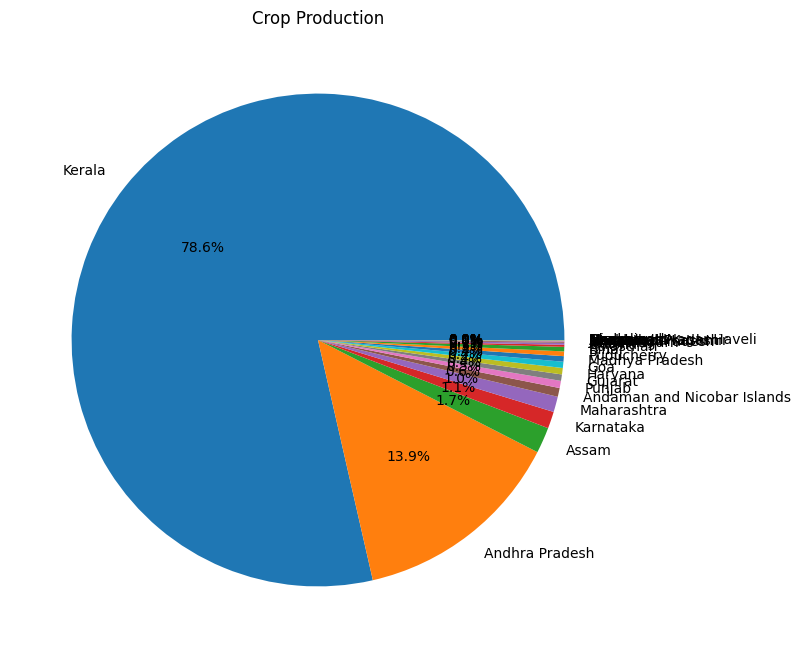

In [104]:
plt.figure(figsize=(10,8))
plt.pie(val, labels=lab, autopct='%1.1f%%', )
plt.title('Crop Production')
plt.show()

In [105]:
coconut_df = crop_df[crop_df['Crop'] == 'Coconut']
coconut_df.to_csv('coconut_df.csv')
crop_df.drop(crop_df[crop_df['Crop'] == 'Coconut'].index, inplace=True)

In [106]:
val = crop_df.groupby('Crop')['Production'].sum().sort_values(ascending=False)
lab = crop_df.groupby('Crop')['Production'].sum().sort_values(ascending=False).index

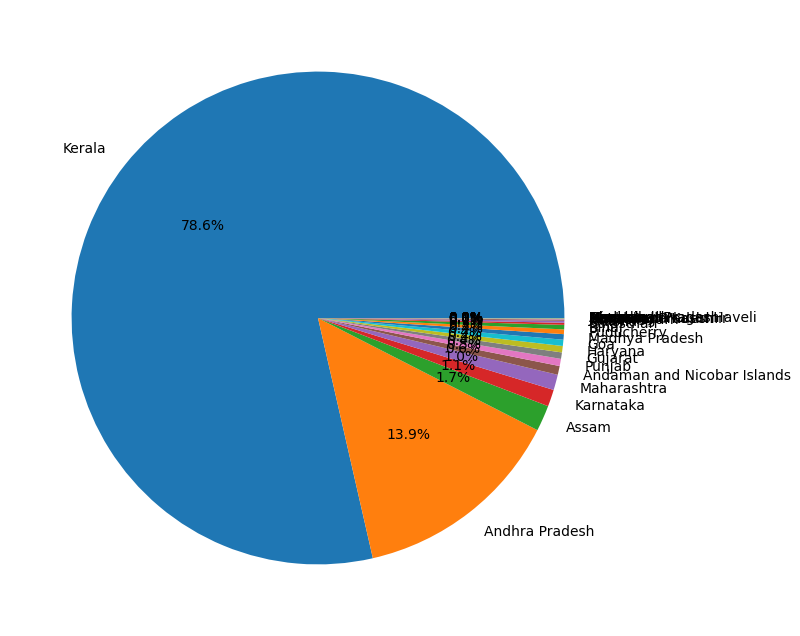

In [110]:
plt.figure(figsize=(10,8))
plt.pie(val, labels=lab, autopct='%3.1f%%', )

plt.show()

In [108]:
crop_df.to_csv('crop_df.csv')